In [1]:
import os, sys
from pathlib import Path

sys.path.insert(0, os.path.expanduser("~/work/washu"))

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np 


/Users/romeo/anaconda/envs/aging3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
#from scripts.util import run
import reports.bed_metrics as bm
import reports.loci_of_interest as loi

------------------------------

In [4]:
from itertools import chain

In [5]:
from pathlib import Path
from itertools import chain
import subprocess 
import os
from collections import defaultdict
import itertools

import numpy as np 



------------------------------

In [6]:
results_dir = Path("/mnt/stripe/bio/experiments/aging/loci_of_interest.tables")
sorted_root = Path("/mnt/stripe/bio/experiments/aging/loci.sorted")
THREADS_N = 32

# results_dir = Path("/Volumes/BigData/bio/experiments/aging/loci_of_interest.tables")
# sorted_root = Path("/Volumes/BigData/bio/experiments/aging/loci.sorted")
# THREADS_N = 8

results_dir.mkdir(exist_ok=True)

# Cleanup

In [7]:
# !rm -rf {sorted_root}
# !rm -rf {results_dir}

# Known annotations

In [8]:
# data_root = Path("/Volumes/BigData/bio")
data_root = Path("/mnt/stripe/bio")

loci_root = data_root / "raw-data/aging/loci_of_interest"
signal_root = data_root / "experiments/signal"

exclude_outliers = False
golden_peaks_root = data_root / "experiments/aging/peak_calling"
zinbra_peaks_root = data_root / "experiments/configs/Y20O20{}".format(
    "" if exclude_outliers else "_full"
)


In [9]:
loi_dict = loi.collect_loci(loci_root)
sorted([str(k) for k in loi_dict.keys()])

['None',
 'chipseq_diff_loci',
 'chromhmm',
 'default',
 'enhancers',
 'golden_consensus',
 'interesting_pathways',
 'od_yd_difference_regions',
 'other_pathways',
 'regulatory',
 'repeats',
 'rna_diff',
 'tfs',
 'zinbra_consensus']

In [10]:
!ls {loci_root}

cd14_enhancer_atlas_CD14+.hg19.bed
chipseq_diff_loci
chromhmm
cpg_clock_1000_hg19.bed
cpg_clock_hg19.bed
cpg_islands_clock_hg19.bed
enhancers
golden_consensus
interesting_pathways
lengths.csv
mirna_human.bed
od_yd_difference_regions
other_pathways
regulatory
repeats
rna_diff
tfs
ucne_conserved_coord.hg19.bed
ucsc_cpgIslandExt.hg19.bed
washu_german_rrbs_filtered_dmrs_all_10.hg19.bed
zinbra_consensus


In [11]:
!ls {zinbra_peaks_root}

peaks  signal unique


In [12]:
!ls {golden_peaks_root}

H3K27ac                          custom_sicer_peaks_frip.sh
H3K27me3                         enhancers
H3K36me3                         intersection.pdf
H3K4me1                          intersection_.pdf
H3K4me3                          median_cons.sh
H3K4me3.pdf                      search_results_test2.csv
cpg_islands_clock_hg19.bed       weak_cons.sh
custom_macs_narrow_peaks_frip.sh


## ChromHMM

In [13]:
for i, p in enumerate(loi_dict["chromhmm"]):
    print(loi.chromhmm_state_descr(p.name), "->", p)

Active TSS (1_TssA) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.1_TssA.bed
Flanking TSS (2_TssFlnk) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.2_TssFlnk.bed
Flanking TSS Upstream (3_TssFlnkU) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.3_TssFlnkU.bed
Flanking TSS Downstream (4_TssFlnkD) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.4_TssFlnkD.bed
Strong transcription (5_Tx) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.5_Tx.bed
Weak transcription (6_TxWk) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.6_TxWk.bed
Genic enhancer1 (7_EnhG1) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.7_EnhG1.bed
Genic enhancer2 (8_EnhG2) -> /mnt/stripe/bio/raw-data/aging/loci_of_interest/chromhmm/cd14_chromhmm.hg19.8_EnhG2.bed
Active Enhancer 1 (9_EnhA1) -> /mnt/stripe/b

## Basic Loci

Cannot include all files from dir, because list is too big and heatmap becomes unreadable. Let's keep curated list
of loci by rules:
* root folder top level *.bed files
* subfoldes: "enchancers", "tfs", "regulatory", "weak_consensus", "zinbra_consensus"

In [14]:
loi_dict["default"]

[PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/enhancers/CTCF.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27me3_golden_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27me3_golden_YDS_we

## Peaks

In [15]:
peaks_dict = {
    "zinbra": loi._collect_zinbra_peaks(zinbra_peaks_root),
    "golden": loi._collect_golden_peaks(golden_peaks_root, exclude_outliers)
}

In [16]:
def peaks_info(peaks_dict, tool):
    tool_peaks_dict = peaks_dict[tool]
    for hist in sorted(tool_peaks_dict.keys()):
        peaks = tool_peaks_dict[hist]
        print("Peaks:", hist, len(peaks))
        print("\n".join(str(f) for f in peaks))    

In [17]:
peaks_info(peaks_dict, "golden")

Peaks: H3K27ac 40
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD10_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD11_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD12_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD13_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD14_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD15_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD16_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD17_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD18_k27ac_hg19_broad_peaks.broadPeak
/mnt/stripe/bio/experiments/aging/peak_calling/H3K27ac/bed_all/OD19_k27ac

In [18]:
peaks_info(peaks_dict, "zinbra")

Peaks: H3K27ac 40
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD10_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD11_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD12_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD13_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD14_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD15_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD16_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD17_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD18_H3K27ac_hg19_1.0E-6_peaks.bed
/mnt/stripe/bio/experiments/configs/Y20O20_full/peaks/H3K27ac/OD_OD19_H3K27ac_hg19

## Consensus

In [19]:
loi_dict["zinbra_consensus"]

[PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27me3_zinbra_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27me3_zinbra_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27me3_zinbra_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K36me3_zinbra_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K36me3_zinbra_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest

In [20]:
loi_dict["golden_consensus"]

[PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27me3_golden_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27me3_golden_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27me3_golden_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K36me3_golden_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K36me3_golden_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest

# Code

In [21]:
!which bedtools

/Users/romeo/anaconda/envs/aging3/bin/bedtools


In [34]:
def process_intersection(beds, loci, path_to_bt, results_dir, tag,
                         figsize=(10,10), col_cluster=False, row_cluster=True,
                         all_metrics=0,
                         **kw):
    
    def load_intersection_table(beds, loci, path_to_bt, result_path, **kw):
        if result_path.exists():
            df = pd.DataFrame.from_csv(result_path)
            print("Loaded: ", result_path)
        else:
            print("Calculating: ", result_path)
            df = bm.bed_metric_table(beds, loci, **kw)
            result_path.parent.mkdir(parents=True, exist_ok=True)
            df.to_csv(str(result_path))
            print("  Saved: ", result_path)

        return df


    dfs_n = []
    df_bl = load_intersection_table(beds, loci, path_to_bt, 
                                    results_dir / "{}_bl.csv".format(tag), threads=THREADS_N)
    display(df_bl.head(3))
    dfs_n.append(df_bl)

    if all_metrics > 0:
        df_lb = load_intersection_table(loci, beds, path_to_bt,
                                        results_dir / "{}_lb.csv".format(tag), threads=THREADS_N)
        display(df_lb.head(3))
        dfs_n.append(df_lb)

    if all_metrics > 1:
        df_mq = np.sqrt(df_bl*df_lb.T)
        dfs_n.append(df_mq)
        
    if all_metrics > 2:
        df_jaccard = load_intersection_table(beds, loci, path_to_bt, 
                                             results_dir / "{}_js.csv".format(tag), threads=THREADS_N,
                                             jaccard = True)
        display(df_jaccard.head(3))
        dfs_n.append(df_jaccard)
    
    def inner_chromhmm_or_donor(name):
        if "row_donors" in kw:
            chunks = name.split('_')
            cands = list(filter(
                lambda s: len(s) > 2 and (s.startswith("OD") or s.startswith("YD")) and s[2] != "S",
                chunks))
            
            if len(cands) > 0:
                return cands[0]
            
        return chromhmm_state_descr(name)
    
    # row_color_fun=bm.heatmap_donor_color_fun(),
    bm.plot_metric_heatmap(
        "Metrics: # intervals from row file intersecting any interval from column file",
        df_bl, figsize=figsize,
        col_label_fun=inner_chromhmm_or_donor, row_label_fun=inner_chromhmm_or_donor,
        col_cluster=col_cluster, row_cluster=row_cluster, **kw
    )

    if all_metrics > 0:
        bm.plot_metric_heatmap(
            "Metrics: # intervals from col file intersecting any interval from row file",
            df_lb, figsize=figsize,
            col_label_fun=inner_chromhmm_or_donor, row_label_fun=inner_chromhmm_or_donor,
            col_cluster=col_cluster, row_cluster=row_cluster, **kw
        )

    
    if all_metrics > 1:
        bm.plot_metric_heatmap(
           "Metrics: Geometric mean for intersectiong intervals",
            df_mq, figsize=figsize,
            col_label_fun=inner_chromhmm_or_donor, row_label_fun=inner_chromhmm_or_donor,
            col_cluster=col_cluster, row_cluster=row_cluster, **kw
        )

    if all_metrics > 2:
        bm.plot_metric_heatmap(
           "Metrics: Jaccard", df_jaccard, figsize=figsize,
            vmin=None, vmax=None,
            col_label_fun=inner_chromhmm_or_donor, row_label_fun=inner_chromhmm_or_donor,
            col_cluster=col_cluster, row_cluster=row_cluster, **kw
        )
    return dfs_n


In [27]:
def check_interests_loci_folder(folder_name,):
    paths = sorted([p for p in (loci_root / folder_name).glob('**/*.bed')])
    suffix = folder_name
    print("Paths: #", len(paths))

    # ChromHMM
    print("Ensure files sorted...")
    mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in paths}
    mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in chromhmm_paths})
    print("[Done]")
    process_intersection(paths, chromhmm_paths, mapping, results_dir, "{}_chromhmm".format(suffix), figsize=(8,8),
                         all_metrics=1)
    
    # Consensus: Y+O
    consensus_paths = sorted(
        [p for p in (zinbra_conensus_paths + golden_conensus_paths) if "DS" not in p.name],
        key=lambda p: p.name
    )
    print("Ensure files sorted...")
    mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in paths}
    mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in consensus_paths})
    print("[Done]")
    process_intersection(paths, consensus_paths, mapping, results_dir, "{}_consensus_short".format(suffix),
                         figsize=(8,8), row_cluster=True, col_cluster=False,
                         all_metrics=1)

    # Consensus: Y,O
    consensus_paths = sorted(
        [p for p in (zinbra_conensus_paths + golden_conensus_paths) if "DS" in p.name], #ODS, YDS
        key=lambda p: p.name
    )
    print("Ensure files sorted...")
    mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in paths}
    mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in consensus_paths})
    print("[Done]")
    process_intersection(paths, consensus_paths, mapping, results_dir, "{}_consensus".format(suffix),
                         figsize=(12,8), row_cluster=True, col_cluster=False)

    # Loci
    print("Ensure files sorted...")
    mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in paths}
    mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in loci_paths})
    print("[Done]")
    process_intersection(paths, loci_paths, mapping, results_dir, "{}_loci".format(suffix), figsize=(20,8),
                         all_metrics=1)

# TMP

In [22]:
!rm {results_dir}/tmp0_loci*

In [23]:
tmp_loci_paths = loi_dict["default"][0:6]
tmp_loci_paths

[PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/enhancers/CTCF.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_YDS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/golden_consensus/H3K27ac_golden_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_ODS_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/raw-data/aging/loci_of_interest/zinbra_consensus/H3K27ac_zinbra_YDS_weak_consensus.bed')]

Metrics results saved to: /mnt/stripe/bio/experiments/aging/loci_of_interest.tables/tmp0_loci.csv


/Users/romeo/anaconda/envs/aging3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


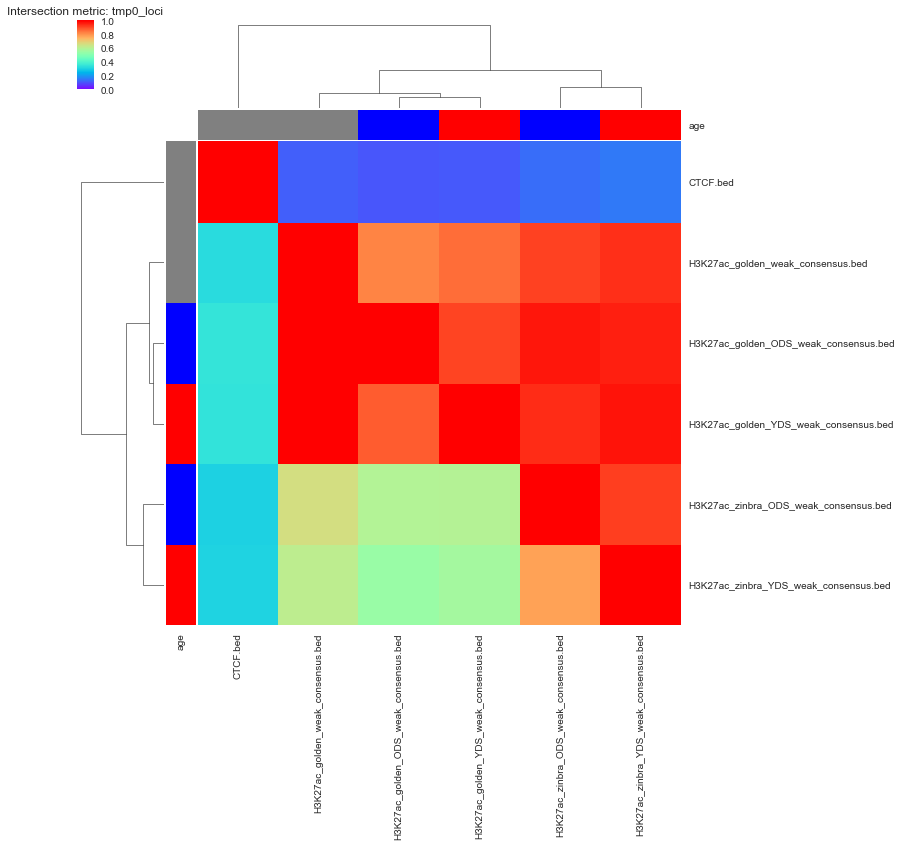

In [24]:
bm.process_intersection_metric(tmp_loci_paths, tmp_loci_paths, results_dir / "tmp0_loci.csv", 
                               figsize=(5,5), threads=THREADS_N)

# Chose Metrics

In [28]:
paths = [loci_root / fname for fname in (
    "ucsc_cpgIslandExt.hg19.bed", 
    "ucne_conserved_coord.hg19.bed", 
    "washu_german_rrbs_filtered_dmrs_all_10.hg19.bed", 
    "cpg_islands_clock_hg19.bed",
    "cpg_clock_1000_hg19.bed"
)]
paths.extend(loi_dict["regulatory"])
paths.extend(loi_dict["golden_median_consensus"])
len(paths)

34

In [ ]:
bm.process_intersection_metric(paths, paths, results_dir / "demoloci.csv", figsize=(5,5), threads=THREADS_N)

In [ ]:
bm.process_intersection_metric(paths, paths, results_dir / "demoloci_jc.csv", jaccard=True, 
                               figsize=(5,5), threads=THREADS_N)

In [31]:
#TODO #TODO #TODO #TODO #TODO #TODO #TODO #TODO #TODO #TODO #TODO #TODO 

In [ ]:
paths = [loci_root / fname for fname in (
    "ucsc_cpgIslandExt.hg19.bed", "ucne_conserved_coord.hg19.bed", 
    "washu_german_rrbs_filtered_dmrs_all_10.hg19.bed", 
    "cpg_islands_clock_hg19.bed", "cpg_clock_1000_hg19.bed"
)]
paths.extend(p for p in (loci_root / "regulatory").glob("*.bed"))
paths.extend(p for p in (loci_root / "golden_consensus").glob("*.bed") if "DS" not in p.name)
paths = sorted(paths, key=lambda p: p.name)
print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in paths}
print("[Done]")

process_intersection(paths, paths, mapping, results_dir, "demoloci", figsize=(10,10),
                     col_cluster=False, row_cluster=False, all_metrics=4)
None

In [ ]:
print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in loci_paths}
print("[Done]")

process_intersection(loci_paths, loci_paths, mapping, results_dir, "loci", figsize=(15,15),
                     col_cluster=True,
                     all_metrics=4)
None

## Demo loci vs Loci


In [38]:
paths = [loci_root / fname for fname in (
    "ucsc_cpgIslandExt.hg19.bed", "ucne_conserved_coord.hg19.bed", 
    "washu_german_rrbs_filtered_dmrs_all_10.hg19.bed", 
    "cpg_islands_clock_hg19.bed", "cpg_clock_1000_hg19.bed"
)]
paths.extend(p for p in (loci_root / "regulatory").glob("*.bed"))
paths.extend(p for p in (loci_root / "golden_consensus").glob("*.bed") if "DS" not in p.name)
paths = sorted(paths, key=lambda p: p.name)
print("Ensure files sorted...")
#mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in paths}
mapping = {p:p for p in paths}
print("[Done]")

process_intersection(paths, paths, mapping, results_dir, "demoloci", figsize=(10,10),
                     col_cluster=False, row_cluster=False, all_metrics=0)
None

Ensure files sorted...
[Done]
Calculating:  /Volumes/BigData/bio/experiments/aging/loci_of_interest.tables/demoloci_bl.csv


Process ForkPoolWorker-22:
Process ForkPoolWorker-20:
Process ForkPoolWorker-21:
Process ForkPoolWorker-19:
Process ForkPoolWorker-18:
Process ForkPoolWorker-17:
Process ForkPoolWorker-23:
Process ForkPoolWorker-24:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "

KeyboardInterrupt: 

  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/Users/romeo/anaconda/envs/aging3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, 

## Loci vs Loci

In [ ]:
print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in loci_paths}
print("[Done]")

process_intersection(loci_paths, loci_paths, mapping, results_dir, "loci", figsize=(15,15),
                     col_cluster=True)
None

## Loci vs ChromHMM

In [ ]:
print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in loci_paths}
mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in chromhmm_paths})
print("[Done]")

process_intersection(loci_paths, chromhmm_paths, mapping, results_dir, "loci_chromhmm", figsize=(8, 15),
                     all_metrics=1, row_cluster=False)
None

## ChromHMM vs ChromHMM

In [ ]:
print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in chromhmm_paths}
print("[Done]")
process_intersection(chromhmm_paths, chromhmm_paths, mapping, results_dir, "chromhmm", figsize=(8,8))
None

## Consensus

### vc Loci

In [ ]:
print("Ensure files sorted...")
mapping = {}
consensus_paths = sorted([p for p in (zinbra_conensus_paths + golden_conensus_paths) if "DS" not in p.name],
                         key=lambda p: p.name)
for p in consensus_paths:
    mapping[p] = as_sorted(p, loci_root, sorted_root  / "loci_of_interest")
for p in all_loci:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

process_intersection(consensus_paths, all_loci, mapping, results_dir, "consensus_short_vs_loci",
                     figsize=(20,4))
None

In [ ]:
print("Ensure files sorted...")
mapping = {}
consensus_paths = sorted(
    [p for p in (zinbra_conensus_paths + golden_conensus_paths) if "DS" in p.name], #ODS, YDS
    key=donor_order_id
)
for p in consensus_paths:
    mapping[p] = as_sorted(p, loci_root, sorted_root  / "loci_of_interest")
for p in all_loci:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

process_intersection(consensus_paths, all_loci, mapping, results_dir, "consensus_yo_vs_loci",
                     figsize=(20,12), row_donors=True, col_cluster=True, row_cluster=True,
                     all_metrics=1)
None

### vs Consensus

In [ ]:
print("Ensure files sorted...")
mapping = {}
consensus_paths = sorted([p for p in (zinbra_conensus_paths + golden_conensus_paths) if "DS" not in p.name],
                         key=lambda p: p.name)
for p in (consensus_paths):
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

dfs = process_intersection(consensus_paths, consensus_paths, mapping, results_dir, "consensus_short", figsize=(6,6),
                     col_cluster=True)
dfs[0]

In [ ]:
print("Ensure files sorted...")
mapping = {}
consensus_paths = sorted(
    [p for p in (zinbra_conensus_paths + golden_conensus_paths) if "DS" in p.name], #ODS, YDS
    key=lambda p: p.name
)
for p in (consensus_paths):
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

process_intersection(consensus_paths, consensus_paths, mapping, results_dir, "consensus_yo", 
                     figsize=(10,10), row_donors=False,
                     col_cluster=False, row_cluster=False)
None

## Zinbra all donors vs Loci

In [ ]:
print("Ensure files sorted...")
mapping = {}
for mod, peaks in zinbra_peaks_by_histmod.items():
    for p in peaks:
        mapping[p] = as_sorted(p, zinbra_peaks_root, sorted_root / "zinbra")
for p in all_loci:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

for mod, peaks in zinbra_peaks_by_histmod.items():
    print(mod)
    process_intersection(peaks, all_loci, mapping, results_dir, "zinbra_{}_vs_loci".format(mod),
                         figsize=(20,10), row_donors=True, 
                         col_cluster=False, row_cluster=False, all_metrics=1)
None    

## Golden all donors vs Loci

In [ ]:
print("Ensure files sorted...")
mapping = {}
for mod, peaks in golden_peaks_by_histmod.items():
    for p in peaks:
        mapping[p] = as_sorted(p, golden_peaks_root, sorted_root / "golden")
for p in all_loci:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

for mod, peaks in golden_peaks_by_histmod.items():
    print(mod)
    process_intersection(peaks, all_loci, mapping, results_dir, "golden_{}_vs_loci".format(mod),
                         figsize=(20,10), row_donors=True,
                         col_cluster=False, row_cluster=False, all_metrics=1)
None

## Pathways

#### Interesting

In [ ]:
folder_name = "interesting_pathways"
paths = sorted([p for p in (loci_root / folder_name).glob('**/*.bed')])
suffix = folder_name

# Consensus Y/0:
consensus_paths = sorted(
    [p for p in (zinbra_conensus_paths + golden_conensus_paths) if "DS" in p.name], #ODS, YDS
    key=lambda p: p.name
)
print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in paths}
mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in consensus_paths})
print("[Done]")
process_intersection(paths, consensus_paths, mapping, results_dir, "{}_consensus".format(suffix),
                     figsize=(8,150), row_cluster=True, col_cluster=False,
                     all_metrics=0)
None

#### Notch pathways & all donors 

In [ ]:
notchpathways = [p for p in (loci_root / "interesting_pathways").glob('R-HSA-266082*.bed')]
notchpathways.extend([p for p in (loci_root / "interesting_pathways").glob('R-HSA-1912399*.bed')])
notchpathways.extend([p for p in (loci_root / "interesting_pathways").glob('R-HSA-264460*_cds.bed')])
notchpathways.sort(key=lambda p: p.name)

print("Ensure files sorted...")
mapping = {}
for mod, peaks in golden_peaks_by_histmod.items():
    for p in peaks:
        mapping[p] = as_sorted(p, golden_peaks_root, sorted_root / "golden")
for p in notchpathways:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

for mod, peaks in golden_peaks_by_histmod.items():
    print(mod)
    process_intersection(peaks, notchpathways, mapping, results_dir, "golden_{}_vs_notch".format(mod),
                         figsize=(20,10), row_donors=True,
                         col_cluster=True, row_cluster=False, all_metrics=1)
None

In [ ]:
notchpathways = [p for p in (loci_root / "interesting_pathways").glob('R-HSA-266082*.bed')]
notchpathways.extend([p for p in (loci_root / "interesting_pathways").glob('R-HSA-1912399*.bed')])
notchpathways.extend([p for p in (loci_root / "interesting_pathways").glob('R-HSA-264460*_cds.bed')])
notchpathways.sort(key=lambda p: p.name)

print("Ensure files sorted...")
mapping = {}
for mod, peaks in zinbra_peaks_by_histmod.items():
    for p in peaks:
        mapping[p] = as_sorted(p, zinbra_peaks_root, sorted_root / "zinbra")
for p in notchpathways:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

for mod, peaks in zinbra_peaks_by_histmod.items():
    print(mod)
    process_intersection(peaks, notchpathways, mapping, results_dir, "zinbra_{}_vs_notch".format(mod),
                         figsize=(20,10), row_donors=True, 
                         col_cluster=True, row_cluster=False, all_metrics=1)
None    

## Repeats

In [ ]:
check_interests_loci_folder("repeats")
None

## TFs

In [ ]:
check_interests_loci_folder("tfs")
None

### By all donors (golden)

In [ ]:
paths = [p for p in (loci_root / "tfs").glob('**/*.bed')]

print("Ensure files sorted...")
mapping = {}
for mod, peaks in golden_peaks_by_histmod.items():
    for p in peaks:
        mapping[p] = as_sorted(p, golden_peaks_root, sorted_root / "golden")
for p in paths:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

for mod, peaks in golden_peaks_by_histmod.items():
    print(mod)
    process_intersection(peaks, paths, mapping, results_dir, "golden_{}_vs_tfs".format(mod),
                         figsize=(20,10), row_donors=True,
                         col_cluster=True, row_cluster=False, all_metrics=1)
None

### By all donors (zinbra)

In [ ]:
paths = [p for p in (loci_root / "tfs").glob('**/*.bed')]

print("Ensure files sorted...")
mapping = {}
for mod, peaks in zinbra_peaks_by_histmod.items():
    for p in peaks:
        mapping[p] = as_sorted(p, zinbra_peaks_root, sorted_root / "zinbra")
for p in paths:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

for mod, peaks in zinbra_peaks_by_histmod.items():
    print(mod)
    process_intersection(peaks, paths, mapping, results_dir, "zinbra_{}_vs_tfs".format(mod),
                         figsize=(20,10), row_donors=True,
                         col_cluster=True, row_cluster=False, all_metrics=1)
None

# Diff Peaks

##  ChipSeq Diff

### vc ChromHmm, Loci, Consensus

In [ ]:
check_interests_loci_folder("chipseq_diff_loci")
None

In [ ]:
###  vs ChromHMM

# diff_chip_root = loci_root / "chipseq_diff_loci"
# diff_chip_paths = [p for p in diff_chip_root.glob('**/*.bed')]

# print("Ensure files sorted...")
# mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in diff_chip_paths}
# mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in chromhmm_paths})
# print("[Done]")
# process_intersection(diff_chip_paths, chromhmm_paths, mapping, results_dir, "diff_chip_chromhmm", figsize=(8,8))

### vs Loci
# diff_chip_root = loci_root / "chipseq_diff_loci"
# diff_chip_paths = [p for p in diff_chip_root.glob('**/*.bed')]

# print("Ensure files sorted...")
# mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in diff_chip_paths}
# mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in loci_paths})
# print("[Done]")
# process_intersection(diff_chip_paths, loci_paths, mapping, results_dir, "diff_chip_loci", figsize=(8,8))


### vs Consensus
# diff_chip_root = loci_root / "chipseq_diff_loci"
# diff_chip_paths = [p for p in diff_chip_root.glob('**/*.bed')]

# consensus_paths = zinbra_conensus_paths + golden_conensus_paths
# print("Ensure files sorted...")
# mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in diff_chip_paths}
# mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in consensus_paths})
# print("[Done]")
# process_intersection(diff_chip_paths, consensus_paths, mapping, results_dir, "diff_chip_consensus",
#                      figsize=(8,8), row_cluster=False, col_cluster=True)


### vs Repeats

In [ ]:
diff_chip_paths = [p for p in (loci_root / "chipseq_diff_loci").glob('**/*.bed')]
repeats_paths = [p for p in (loci_root / "repeats").glob('**/*.bed')]

print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in diff_chip_paths}
mapping.update({p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in repeats_paths})
print("[Done]")
process_intersection(diff_chip_paths, repeats_paths, mapping, results_dir, "chipseq_diff_repeats",
                     figsize=(8,8), row_cluster=False, col_cluster=True)
None

### vs all donors by golden tools

In [ ]:
diff_chip_paths = [p for p in (loci_root / "chipseq_diff_loci").glob('**/*.bed')]

print("Ensure files sorted...")
mapping = {}
for mod, peaks in golden_peaks_by_histmod.items():
    for p in peaks:
        mapping[p] = as_sorted(p, golden_peaks_root, sorted_root / "golden")
for p in diff_chip_paths:
    mapping[p] = as_sorted(p, loci_root, sorted_root / "loci_of_interest")
print("[Done]")

for mod, peaks in golden_peaks_by_histmod.items():
    print(mod)
    process_intersection(peaks, diff_chip_paths, mapping, results_dir, "golden_{}_vs_chipdiff".format(mod),
                         figsize=(20,10), row_donors=True,
                         col_cluster=True, row_cluster=False, all_metrics=1)
None

### vs Diff ChipSeq

In [ ]:
diff_chip_paths = [p for p in (loci_root / "chipseq_diff_loci").glob('**/*.bed')]

print("Ensure files sorted...")
mapping = {p:as_sorted(p, loci_root, sorted_root / "loci_of_interest") for p in diff_chip_paths}
print("[Done]")
process_intersection(diff_chip_paths, diff_chip_paths, mapping, results_dir, "chipseq_diff_vs_chipseq_diff",
                     figsize=(8,8), row_cluster=True, col_cluster=True)
None

## RnaSeq diff

In [ ]:
check_interests_loci_folder("rna_diff")
None

# Coverage (Signal)

In [ ]:
signal_root

In [ ]:
signals_results_dir = results_dir / "signals"

## Plots

In [ ]:
! rm -rf {signals_results_dir}

In [ ]:
if signals_results_dir.exists():
    # TODO: load
    pass
else:
    signal_dfs_by_datatype = {}
    signal_dfs_by_loci = {}
    missed_files = []

    signals_results_dir.mkdir(exist_ok=True, parents=True)
    
    series_by_loci = defaultdict(list)
    data_type_paths = [p for p in signal_root.iterdir() if p.is_dir()]
    for i, data_type_path in enumerate(data_type_paths, 1):
        data_type = data_type_path.name
        print("[{}/{}] Processing: {}".format(i, len(data_type_paths), data_type))

        for norm in ["raw", "rpkm", "rpm"]:
            print("  Normalization:", norm)
            series_by_datatype = []

            # TODO: load from results dir?
            for loci_path in (p for p in data_type_path.iterdir() if p.is_dir()):
                loci = loci_path.name
                files = [p for p in loci_path.glob("**/*_{}_data.csv".format(norm))]

                assert len(files) <= 1, "{}@{} [{}] Expected one file, but was {}: {}".format(
                    data_type, loci, norm, len(files), files
                )
                if not len(files):
                    missed_files.append("{}@{} [{}]".format(data_type, loci, norm))
                    continue

                df = pd.DataFrame.from_csv(files[0] , header=None)
                series = df.iloc[:,0]
                series.name = loci

                series_by_datatype.append(series) 

                series2 = series.copy()
                series2.name = data_type
                series_by_loci[(loci, norm)].append(series2)

            if len(series_by_datatype):
                # by data type:    
                df = pd.DataFrame(series_by_datatype, )
                #df.index = [f.stem for f in itertools.islice(files, 10)]

                df.to_csv(str(signals_results_dir / "signal_{}_{}.csv".format(data_type, norm)))
            else:
                df = None
            signal_dfs_by_datatype[(data_type, norm)] = df

    for (loci, norm), series in series_by_loci.items():
        if len(series):
            df = pd.DataFrame(series, )
            df.to_csv(str(signals_results_dir / "signal_{}_{}".format(loci, norm)))
        else:
            df = None
        signal_dfs_by_loci[(loci, norm)] = df
        
    print("Missed files: ", len(missed_files))
    print("  first 10:", *missed_files[0:10])
    print("Signal by datatype, missed records:", str(sum(1 for v in signal_dfs_by_datatype.values() if v is None)))
    print("  ", [k for k,v in signal_dfs_by_datatype.items() if v is None])
    print("Signal by loci, missed records:", str(sum(1 for v in signal_dfs_by_loci.values() if v is None)))    
    print("  ", [k for k,v in signal_dfs_by_loci.items() if v is None])

In [ ]:
signal_dfs_by_datatype[("H3K4me1", "rpkm")].head()

In [ ]:
signal_dfs_by_loci[("washu_german_rrbs_filtered_dmrs_all_10.hg19", "rpkm")].head()

In [ ]:
def plot_donors_heatmap(title, df, path=None, autoscale=False, 
                        label_fun=None, figsize=(10,10),
                        col_cluster=False, row_cluster=False):
    if autoscale:
        vmin, vmax = None, None
    else:
        vmin, vmax = 0, 1
        
    if label_fun:
        df = df.copy()
        df.columns = [label_fun(s) for s in df.columns]
        df.index = [label_fun(s) for s in df.index]
        
    donors_colors = ["g" if d.lower().startswith("od") else ("b" if d.lower().startswith("YD") else "b")
                     for d in df.index]
    row_colors = pd.Series(data=donors_colors, index=df.index, name="age")
            
    g = sns.clustermap(df,
                       col_cluster=col_cluster, row_cluster=row_cluster,
                       figsize=figsize, cmap="rainbow",
                       metric="chebyshev",
                       standard_scale = None,
                       vmin=vmin, vmax=vmax,
                       row_colors=row_colors,
                       robust=True) #robust=True: ignore color outliers
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

    plt.title(title)
    if path is None:        
        plt.show()
    else:
        pp.savefig()
        
def plot_signal_heatmap(tag, metric, signal_dfs, *args,
                        col_filter_fun=None,
                        **kw):

    df = signal_dfs[(tag, metric)]
    if df is None:
        return

    df = df.T
        
    # let's sort by index, not just lexicographically, but in human readable order, e.g. OD2 shoud be before OD10
    def inner_donor_order_id(name):
        assert (len(name) > 2 and (name.startswith("od") or name.startswith("yd")))
        return (name[:2], int(name[2:]))

    df = df.loc[sorted(df.index.tolist(), key=inner_donor_order_id), :]
    
    if col_filter_fun:
        df = df.loc[:, [c for c in df.columns if col_filter_fun(c)]]

    # Normalize by columns (by loci across all donors)
    df = ((df - np.min(df, axis=0))/(np.max(df, axis=0) - np.min(df, axis=0)))
    plot_donors_heatmap("[{}]: {}".format(metric, tag), df, *args, **kw)

In [ ]:
# Not pathways:{k for k,v in signal_dfs_by_loci.keys() if not k.startswith("R")}

### All signal @ CGI

In [ ]:
for norm in ["raw", "rpkm", "rpm"]:
    plot_signal_heatmap("ucsc_cpgIslandExt.hg19", norm, signal_dfs_by_loci, 
                        #col_filter_fun=lambda x: x == "meth",
                        row_cluster=False, col_cluster=False)

### All signal @ (DMR, 14_TssBiv, 15_Enh_Biv)

In [ ]:
for loci in ['cd14_chromhmm.hg19.14_TssBiv', 'cd14_chromhmm.hg19.15_EnhBiv', "washu_german_rrbs_filtered_dmrs_all_10.hg19"]:
    for norm in ["raw", "rpkm", "rpm"]:
        plot_signal_heatmap(loci, norm, signal_dfs_by_loci, 
                            col_filter_fun=lambda x: x == "H3K4me1",
                            row_cluster=True, col_cluster=False)

### H3K3me1 signal @ loci

In [ ]:
for norm in ["raw", "rpkm", "rpm"]:
    plot_signal_heatmap("H3K4me1", norm, signal_dfs_by_datatype, 
                        col_filter_fun=lambda loci: not loci.startswith("R-HSA"),
                        row_cluster=False, col_cluster=True,
                        figsize=(24, 10))

### Every data type @ ChromHMM

In [ ]:
for norm in ["raw", "rpkm", "rpm"]:
    for histmod in {k for k,v in signal_dfs_by_datatype.keys()}:
        display(norm + ":" + histmod)
        plot_signal_heatmap(histmod, norm, signal_dfs_by_datatype, 
                            col_filter_fun=lambda loci: loci.startswith("cd14_chromhmm"),
                            row_cluster=False, col_cluster=False)

## Stat testing

In [ ]:
signal_root

In [ ]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

signal_pvalues = defaultdict(list)
missed_files = []
problem_files = []
ha = "two-sided" # 'less', 'two-sided', or 'greater'
data_type_paths = [p for p in signal_root.iterdir() if p.is_dir()]
for i, data_type_path in enumerate(data_type_paths, 1):
    data_type = data_type_path.name
    print("\n[{}/{}] Processing: {}".format(i, len(data_type_paths), data_type))
    
    for j, loci_path in enumerate(p for p in data_type_path.iterdir() if p.is_dir()):
        loci = loci_path.name
        print(".", end="")

        pvalues = {}
        signal_normalizations = ["raw", "rpkm", "rpm"]
        for norm in signal_normalizations:
            files = [p for p in loci_path.glob("**/*_{}_data.csv".format(norm))]
            
            assert len(files) <= 1, "{}@{} [{}] Expected one file, but was {}: {}".format(
                data_type, loci, norm, len(files), files
            )
            if not len(files):
                missed_files.append("{}@{} [{}]".format(data_type, loci, norm))
                continue
            
            file = files[0]
            df = pd.DataFrame.from_csv(file , header=None)
            df_ods = df.loc[[d for d in df.index if d.startswith("o")],:]
            df_yds = df.loc[[d for d in df.index if d.startswith("y")],:]
            try:
                pvalue = mannwhitneyu(df_ods.iloc[:,0], df_yds.iloc[:,0],
                                      alternative=ha).pvalue
            except ValueError as e:
                print("Error: {} in file:\n{}".format(e, file))
                problem_files.append(file)    
            pvalues[norm] = pvalue

        signal_pvalues["name"].append("{}@{}".format(data_type, loci))    
        for norm in signal_normalizations:
            signal_pvalues[norm].append(pvalues.get(norm, np.nan)) #1.0

print("Missed files: ", len(missed_files))
print("  first 10:", *missed_files[0:10])
print("Errors occurred in files: ", len(problem_files))
print("  first 10:", *problem_files[0:10])

signal_pvalues_df = pd.DataFrame.from_dict(signal_pvalues)
signal_pvalues_df.to_csv(str(results_dir / "signal_pvalues.csv"))

print("Processed hypothesis:", len(signal_pvalues_df))
signal_pvalues_df.head(10)

In [ ]:
signal_pvalues_df.index = signal_pvalues_df.name
signal_pvalues_df.drop("name", inplace=True, axis=1)

print("Not corrected pval, first 10 lowerest pvalues:")
signal_pvalues_df["min"] = signal_pvalues_df.min(axis=1)
signal_pvalues_df.sort_values(by="min").head(10)

In [ ]:
def manhattan_plot(pvalues_df, correction="Uncorrected"):
    plt.figure(figsize=(10,10))
    for i, norm in enumerate(["raw", "rpkm", "rpm"], 1):
        n = pvalues_df.shape[0]
        ax = plt.subplot(2, 2, i)
        #plt.plot(range(n), -np.log10(pvalues_df["raw"]), marker=".", ls="")
        #ax.hlines(y=-np.log10(0.05), xmin=0, xmax=n, color="r", linestyle='dotted')
        ax.plot(range(n), 1/pvalues_df[norm], marker=".", ls="")
        ax.axhline(y=-np.log10(0.05), xmin=0, xmax=n, color="r", linestyle='dotted')
        ax.set_ylabel("{} pvalues (-log(p) scale )".format(correction))
        ax.set_yscale("log")
        ax.set_title("[{}] Mann whitney u test pvalues".format(norm))
    plt.show()

In [ ]:
manhattan_plot(signal_pvalues_df)

In [ ]:
# P-values correction
#
# see: http://www.statsmodels.org/dev/_modules/statsmodels/stats/multitest.html
signal_pvalues_bh_df = signal_pvalues_df.copy().drop("min", axis=1)
for c in signal_pvalues_bh_df.columns:
    pvals = signal_pvalues_bh_df.loc[:, c]
    pvals_not_nan_mask = ~np.isnan(pvals)
    pvals_not_nan = pvals[pvals_not_nan_mask]
    _reject, pvals_corrected, *_ = multipletests(pvals=pvals_not_nan, 
                                                 alpha=0.05, method="fdr_bh") #fdr_bh, holm-sidak, bonferroni 
    signal_pvalues_bh_df.loc[pvals_not_nan_mask, c] = pvals_corrected
#     _reject, pvals_corrected, *_ = multipletests(pvals=signal_pvalues_df.loc[:, c], 
#                                                  alpha=0.05, method="fdr_bh")
#     df_fdr_bh[c] = pvals_corrected
    
signal_pvalues_bh_df["min"] = signal_pvalues_bh_df.min(axis=1, skipna=True)
signal_pvalues_bh_sorted_df = signal_pvalues_bh_df.sort_values(by="min")

In [ ]:
manhattan_plot(signal_pvalues_bh_sorted_df, "Benjamini–Hochberg corrected")

In [ ]:
signal_pvalues_bh_sorted_df_005 = signal_pvalues_bh_sorted_df[signal_pvalues_bh_sorted_df["min"] < 0.05]
print("Passing FDR 0.05 by any metric:", len(signal_pvalues_bh_sorted_df_005))
signal_pvalues_bh_sorted_df_005.head(10)

In [ ]:
signal_pvalues_df.loc[signal_pvalues_bh_sorted_df_005.head(10).index, :]

In [ ]:
print("Corrected, first 10 lowerest pvalues:")
display(signal_pvalues_bh_sorted_df.head(10))

print("Same records, but original pvalues:")
display(signal_pvalues_df.loc[signal_pvalues_bh_sorted_df.head(10).index, :])

In [ ]:
np.min(signal_pvalues_bh_sorted_df["raw"]), np.max(signal_pvalues_bh_sorted_df["raw"])

In [ ]:
print("Corrected, dmr related pvalues:")
signal_pvalues_bh_sorted_df.loc[signal_pvalues_bh_sorted_df.index.str.contains("dmr"), :]